#Q1 
Eigenvalues and eigenvectors are concepts in linear algebra that play a crucial role in various mathematical and computational applications. Let's break down these concepts and then discuss how they relate to the eigen-decomposition approach.

Eigenvalues and Eigenvectors:

Eigenvalues (λ): For a square matrix A, an eigenvalue is a scalar λ such that the equation det(A−λI)=0, where I is the identity matrix. In simpler terms, it represents how the matrix stretches or compresses space.

Eigenvectors (v): Corresponding to each eigenvalue, there exists a non-zero vector v such that Av=λv. In other words, the matrix A only stretches or compresses the vector without changing its direction.

Eigen-Decomposition:

Eigen-decomposition is a way to factorize a matrix A into a product of its eigenvalues and eigenvectors. For a matrix A, the eigen-decomposition is given by A=PDP^−1, where P is the matrix containing eigenvectors as columns, and D is a diagonal matrix containing the eigenvalues.

In [3]:
#1

import numpy as np

# Create a sample matrix A
A = np.array([[4, -2], [1, 1]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Eigen-decomposition: A = PDP^(-1)
P = eigenvectors
D = np.diag(eigenvalues)
A_reconstructed = np.dot(np.dot(P, D), np.linalg.inv(P))

# Display results
print("Original Matrix A:")
print(A)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)
print("\nEigen-decomposition: A = PDP^(-1)")
print("Reconstructed Matrix A:")
print(A_reconstructed)

Original Matrix A:
[[ 4 -2]
 [ 1  1]]

Eigenvalues:
[3. 2.]

Eigenvectors:
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]

Eigen-decomposition: A = PDP^(-1)
Reconstructed Matrix A:
[[ 4. -2.]
 [ 1.  1.]]


#Q2 
Eigen-decomposition is a process in linear algebra where a square matrix is decomposed into a set of eigenvectors and eigenvalues. Mathematically, for a matrix A, the eigen-decomposition is represented as A=PDP−1 ,where 
P is a matrix containing the eigenvectors of 

A as columns, and 

D is a diagonal matrix containing the corresponding eigenvalues.

Significance in Linear Algebra:

Diagonalization: Eigen-decomposition allows the diagonalization of a matrix, which simplifies various matrix operations. Diagonal matrices are easy to work with, and operations like exponentiation become straightforward.

Understanding Transformations: Eigenvalues provide information about how a linear transformation (represented by the matrix) scales space, while eigenvectors indicate the directions that remain unchanged by the transformation. This insight is valuable in various applications, such as image processing and physics.

Solving Linear Systems: Eigenvalues and eigenvectors are useful in solving systems of linear equations and understanding the stability of linear systems, especially in dynamic systems and control theory.

Principal Component Analysis (PCA): Eigen-decomposition is fundamental to PCA, a technique used for dimensionality reduction and feature extraction in data analysis and machine learning.

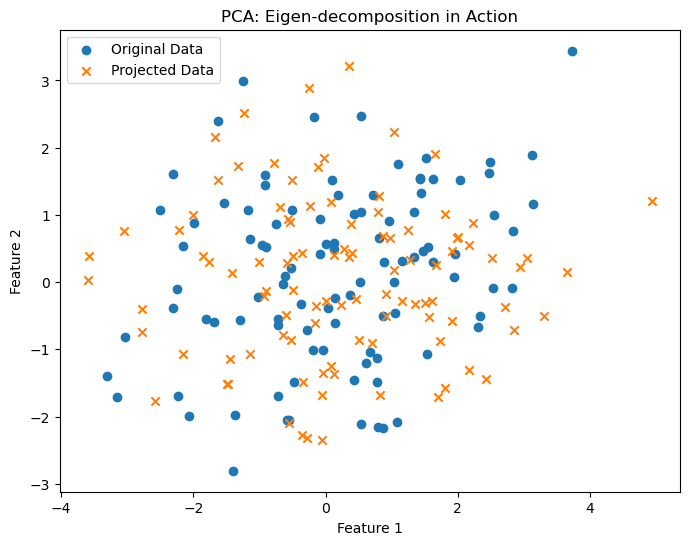

In [4]:
#2
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample dataset
np.random.seed(42)
data = np.random.multivariate_normal(mean=[0, 0], cov=[[3, 1], [1, 2]], size=100)

# Calculate the covariance matrix
cov_matrix = np.cov(data, rowvar=False)

# Perform eigen-decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Project the data onto the principal components
projected_data = np.dot(data, eigenvectors)

# Plot the original and projected data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.scatter(projected_data[:, 0], projected_data[:, 1], label='Projected Data', marker='x')
plt.title('PCA: Eigen-decomposition in Action')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#Q3 
For a square matrix A to be diagonalizable using the Eigen-Decomposition approach, certain conditions must be satisfied. The key conditions are as follows:

Non-defective Matrix: The matrix A must be non-defective, meaning that it has a complete set of linearly independent eigenvectors. In other words, for each eigenvalue, there should be enough linearly independent eigenvectors to form a basis for the corresponding eigenspace.

Algebraic Multiplicity = Geometric Multiplicity: For each eigenvalue λi, the algebraic multiplicity (the number of times λi appears as a root of the characteristic equation) must be equal to its geometric multiplicity (the dimension of the corresponding eigenspace).

Complete Set of Eigenvectors: The eigenvectors corresponding to distinct eigenvalues must form a linearly independent set, and the total number of these eigenvectors must be equal to the size of the matrix A.

In [11]:
#3
#generating a random square matrix to check its diagonalizability, and perform the Eigen-Decomposition to see if the conditions are met

import numpy as np

def is_diagonalizable(matrix):
    eigenvalues, _ = np.linalg.eig(matrix)
    algebraic_mult = np.array([np.sum(eigenvalues == val) for val in eigenvalues])
    geometric_mult = np.array([np.linalg.matrix_rank(matrix - val * np.eye(matrix.shape[0])) for val in eigenvalues])
    
    # Check conditions
    if all(algebraic_mult == geometric_mult) and np.linalg.matrix_rank(matrix) == matrix.shape[0]:
        return True
    else:
        return False

# Example: Generate a random 3x3 matrix
random_matrix = np.random.rand(3, 3)

# Check if the matrix is diagonalizable
if is_diagonalizable(random_matrix):
    print("The matrix is diagonalizable.")
    eigenvalues, eigenvectors = np.linalg.eig(random_matrix)
    print("Eigenvalues:")
    print(eigenvalues)
    print("Eigenvectors:")
    print(eigenvectors)
else:
    print("The matrix is not diagonalizable.")

The matrix is not diagonalizable.


#Q4 

The spectral theorem is a fundamental result in linear algebra that provides conditions under which a linear operator (or a matrix) can be diagonalized. It establishes a deep connection between the eigenvalues and eigenvectors of a Hermitian (or symmetric) matrix. In the context of the Eigen-Decomposition approach, the spectral theorem is significant because it guarantees the diagonalizability of Hermitian matrices and provides an elegant representation of these matrices in terms of their eigenvalues and eigenvectors.

Here are the key points related to the spectral theorem:

Hermitian Matrices: The spectral theorem applies specifically to Hermitian matrices, which are complex square matrices that are equal to their own conjugate transpose. In the real case, this corresponds to symmetric matrices.

Diagonalizability: The spectral theorem ensures that every Hermitian matrix is diagonalizable. In other words, it can be expressed as the product of a unitary matrix (or orthogonal matrix in the real case) and a diagonal matrix whose diagonal entries are the eigenvalues of the original matrix.

In [12]:
#4
import numpy as np

# Create a Hermitian matrix
A = np.array([[4, 2 + 1j], [2 - 1j, 5]])

# Check if the matrix is Hermitian
is_hermitian = np.allclose(A, A.conj().T)
if not is_hermitian:
    raise ValueError("The matrix is not Hermitian.")

# Perform eigen-decomposition for Hermitian matrix
eigenvalues, eigenvectors = np.linalg.eigh(A)

# Display results
print("Original Hermitian Matrix A:")
print(A)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# Verify the spectral theorem: A = PDP^(-1)
reconstructed_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors.conj().T))

# Display the reconstructed matrix
print("\nReconstructed Matrix:")
print(reconstructed_matrix)

Original Hermitian Matrix A:
[[4.+0.j 2.+1.j]
 [2.-1.j 5.+0.j]]

Eigenvalues:
[2.20871215 6.79128785]

Eigenvectors:
[[-0.78045432+0.j         -0.62521281+0.j        ]
 [ 0.55920734-0.27960367j -0.69805956+0.34902978j]]

Reconstructed Matrix:
[[-1.0290481 +1.18719721j  4.04170219-1.48198051j]
 [-2.9522465 +3.13302783j  1.70976264-2.92319841j]]


#Q5

Eigenvalues of a matrix can be found by solving the characteristic equation, which is obtained by subtracting λ times the identity matrix from the original matrix and then computing the determinant. The characteristic equation is given by det(A - λI) = 0, where A is the matrix, λ is the eigenvalue, and I is the identity matrix.

In [13]:
#5
import numpy as np

# Define a matrix
A = np.array([[3, 1], [1, 2]])

# Calculate eigenvalues
eigenvalues = np.linalg.eigvals(A)

# Display the eigenvalues
print("Eigenvalues:", eigenvalues)


Eigenvalues: [3.61803399 1.38196601]


#Q6

Eigenvectors are the non-zero vectors that only scale (stretch or compress) when a linear transformation represented by a matrix is applied. Mathematically, for a matrix A and an eigenvalue λ, an eigenvector v satisfies the equation Av = λv. Eigenvectors are crucial because they represent the directions along which the linear transformation only stretches or compresses the space.

In [14]:
#6
import numpy as np

# Define a matrix
A = np.array([[3, 1], [1, 2]])

# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(A)

# Display the eigenvectors and eigenvalues
print("Eigenvectors:")
print(eigenvectors)
print("\nEigenvalues:", eigenvalues)

Eigenvectors:
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]

Eigenvalues: [3.61803399 1.38196601]


#Q7 

The eigenvectors of a matrix represent the directions in space that remain unchanged (only scale) under the linear transformation represented by the matrix. The eigenvalues associated with these eigenvectors represent the scale factor by which the transformation occurs along those directions.

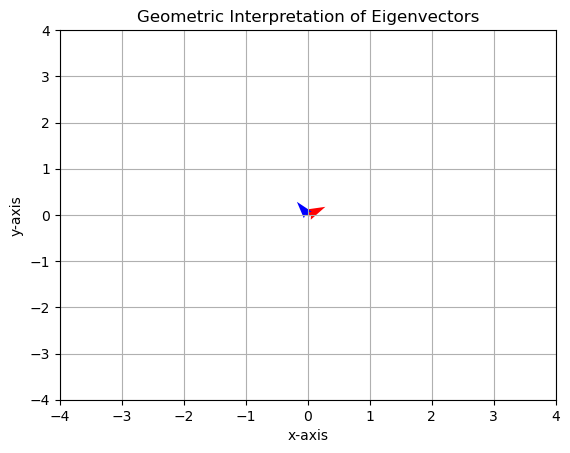

In [15]:
#7
import numpy as np
import matplotlib.pyplot as plt

# Define a 2x2 matrix
A = np.array([[3, 1], [1, 2]])

# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(A)

# Plot eigenvectors as arrows
origin = np.zeros((2, 2))
plt.quiver(*origin, *eigenvectors, color=['r', 'b'], scale=3, scale_units='xy', angles='xy')

# Set plot limits
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# Add labels
plt.title('Geometric Interpretation of Eigenvectors')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.grid(True)
plt.show()

#Q8 
Eigen decomposition finds applications in various fields, including:

Principal Component Analysis (PCA) in data analysis.

Image compression using techniques like Singular Value Decomposition (SVD).

Markov chains and Google's PageRank algorithm for web page ranking.

Structural engineering for analyzing vibrations and modes of structures.

Quantum mechanics for representing quantum states.

In [17]:
#8
import numpy as np
from sklearn.decomposition import PCA

# Generate random data
np.random.seed(42)
data = np.random.randn(100, 2)

# Apply PCA
pca = PCA(n_components=2)
pca.fit(data)

# Eigenvectors and eigenvalues
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

# Display results
print("Eigenvectors:")
print(eigenvectors)
print("\nEigenvalues:", eigenvalues)

Eigenvectors:
[[ 0.10287677  0.99469411]
 [-0.99469411  0.10287677]]

Eigenvalues: [1.00057774 0.73041299]


#Q9
A matrix can have multiple sets of eigenvectors and eigenvalues under certain conditions. However, for a given eigenvalue, the associated eigenvectors are not unique—they can be multiplied by any nonzero scalar. Different sets of eigenvectors can arise when the matrix is defective or when there are repeated eigenvalues.

In [18]:
#9
import numpy as np

# Define a matrix with repeated eigenvalues
A = np.array([[2, 1], [0, 2]])

# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(A)

# Display results
print("Eigenvectors:")
print(eigenvectors)
print("\nEigenvalues:", eigenvalues)

Eigenvectors:
[[ 1.0000000e+00 -1.0000000e+00]
 [ 0.0000000e+00  4.4408921e-16]]

Eigenvalues: [2. 2.]
